# 3. 탐색적 데이터 분석(EDA)

### 머신 러닝 프로젝트 진행과정 ( Workflow )

1. 데이터 수집 (Data Collection)
    - 웹 사이트에 있는 자료 : 웹 크롤링
    - 서비스에서 유저들의 행동 데이터 수집 : 서비스 로그
<br>


2. 데이터 전처리 (Data Preprocessing)
    - Raw data는 빠진 부분, 중복, 이상한 값 등 더럽습니다.
    - 더러운 초기 데이터를 정제해서 머신러닝 모델의 입력에 적합한 형태로 바꿔주는 단계를 데이터 정제(Data Cleaning)이라고 합니다.
    - **Feature Engineering** : 예컨대 집의 가격을 예측할 때는 가로, 세로 길이보다 면적이 더 중요할 것이므로 새로운 피쳐를 만들어줍니다.
<br>


3. 탐색적 데이터분석 (EDA: Exploratory Data Analysis)
    - 프로젝트의 성공여부는 얼마나 데이터를 이해하고 있느냐에 좌우됩니다. 데이터를 이해하기 위해 데이터의 특징을 찾고, 숨겨진 패턴을 발견하는 과정을 EDA라고 부릅니다.
    - 구체적으로 데이터의 히스토그램을 그려보고, 두 변수 사이의 산포도를 그려보고, 변수들의 상관관계를 보는 일 등을 포함합니다.
<br>


4. 모델 선택 (Model Selection)
    - 첫째, 예측값을 계산하는 알고리즘을 선택하는 것 (Logistic Regression, K-NN, SVM, Deep Learning)
    - 둘째, 모델이 사용할 속성들(features)을 선택하는 것
    - 셋째, 같은 모델이더라도 초모수(Hyperparameter)에 따라서 성능이 천차만별이므로, 초모수를 잘 선택하는 것
<br>


5. 평가 및 적용 (Evaluation & Application)
    - 프로젝트에서 가장 중요하지만 가장 실수가 자주 일어나는 과정입니다. 반드시 지켜야 하는 점은 **테스트 데이터셋은 모델 선택과 모델 학습 과정에서 쓰이지 않아야 한다는 점** 입니다.
    - 평가 과정의 목적이 모델이 새로운 데이터에 대해 얼마나 **일반화(generalization)** 가능한지 측정하는 것이기 때문입니다.
<br>


6. 결론
    - EDA, 전처리, 모델 선택 과정은 순차적이 아니라 반복적인 관계

---
### EDA

In [14]:
# 데이터를 임포트하여 메모리에 올린다.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# 데이터의 모양을 확인한다.
# print(df_train.head())

# 데이터의 타입을 체크한다.
# 해당 변수의 타입을 제대로 맞추어주기 위해서이다.
# 만약에 숫자로된 명목형 변수의 경우 int64 등으로 잘못 타입이 들어가 있는 경우가 있다.
print(df_train.info(),'\n')

print(df_train.describe(),'\n')
print(df_test.describe(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None 

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    

---
### 누락 데이터 탐지 및 제거

**유용한 함수들**
- set(list_x): list_x를 값이 중복되지 않으며 순서가 없는 set (집합)형태로 변환합니다.
- pd.isna(x) / pd.isnull(x): 데이터 x 가 누락된 데이터이면 True, 아니면 False를 출력합니다.
- pd.DataFrame.drop(colums = 'a'): 'a’열을 삭제한 DataFrame을 반환합니다.
- pd.DataFrame.drop(index = 'a'): 'a’행을 삭제한 DataFrame을 반환합니다.

항목: PassengerId	 비어있는 자료의 비율: 0.00%
항목:   Survived	 비어있는 자료의 비율: 0.00%
항목:     Pclass	 비어있는 자료의 비율: 0.00%
항목:       Name	 비어있는 자료의 비율: 0.00%
항목:        Sex	 비어있는 자료의 비율: 0.00%
항목:        Age	 비어있는 자료의 비율: 19.87%
항목:      SibSp	 비어있는 자료의 비율: 0.00%
항목:      Parch	 비어있는 자료의 비율: 0.00%
항목:     Ticket	 비어있는 자료의 비율: 0.00%
항목:       Fare	 비어있는 자료의 비율: 0.00%
항목:      Cabin	 비어있는 자료의 비율: 77.10%
항목:   Embarked	 비어있는 자료의 비율: 0.22%


항목: PassengerId	 비어있는 자료의 비율: 0.00%
항목:     Pclass	 비어있는 자료의 비율: 0.00%
항목:       Name	 비어있는 자료의 비율: 0.00%
항목:        Sex	 비어있는 자료의 비율: 0.00%
항목:        Age	 비어있는 자료의 비율: 20.57%
항목:      SibSp	 비어있는 자료의 비율: 0.00%
항목:      Parch	 비어있는 자료의 비율: 0.00%
항목:     Ticket	 비어있는 자료의 비율: 0.00%
항목:       Fare	 비어있는 자료의 비율: 0.24%
항목:      Cabin	 비어있는 자료의 비율: 78.23%
항목:   Embarked	 비어있는 자료의 비율: 0.00%


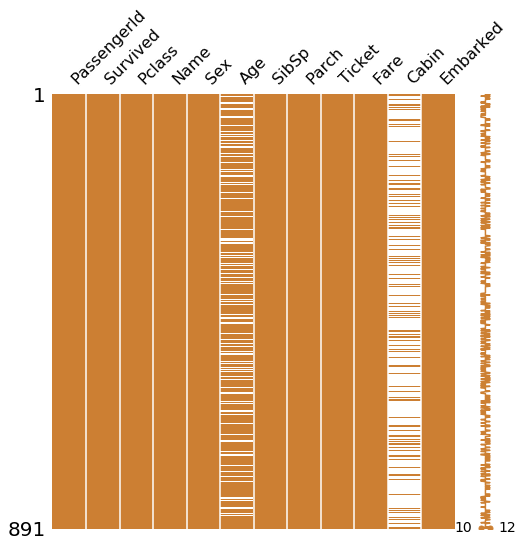

In [27]:
import missingno as msno

# 데이터의 Null 값을 체크한다.
for col in df_train.columns:
    msg = '항목: {:>10}\t 비어있는 자료의 비율: {:.2f}%'.format(col,100*(df_train[col].isnull().sum()/ df_train[col].shape[0]))
    print(msg)
print('\n')
    
for col in df_test.columns:
    msg2 = '항목: {:>10}\t 비어있는 자료의 비율: {:.2f}%'.format(col,100*(df_test[col].isnull().sum()/ df_test[col].shape[0]))
    print(msg2)

# 시각화
msno.matrix(df=df_train.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))

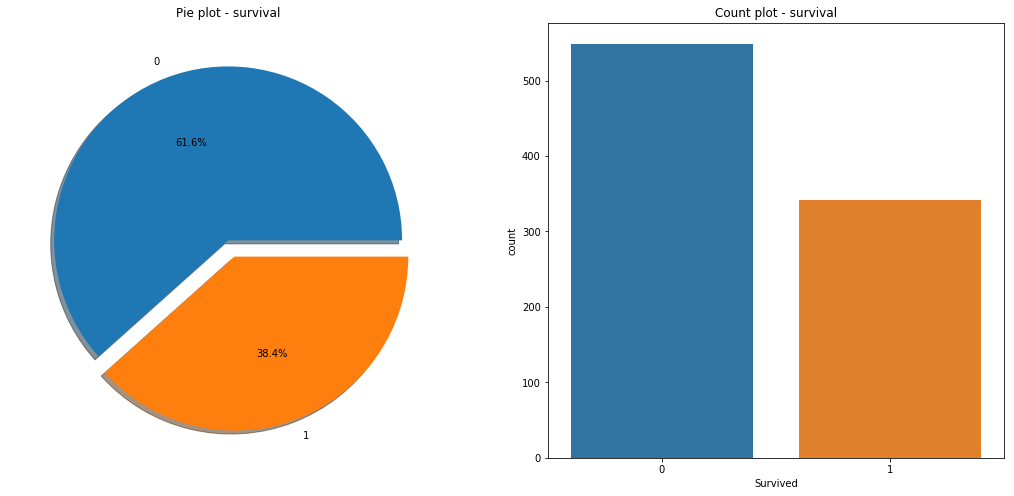

In [30]:
f, ax = plt.subplots(1,2, figsize = (18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Pie plot - survival')
ax[0].set_ylabel('')
sns.countplot('Survived', data = df_train, ax=ax[1])
ax[1].set_title('Count plot - survival')

plt.show()

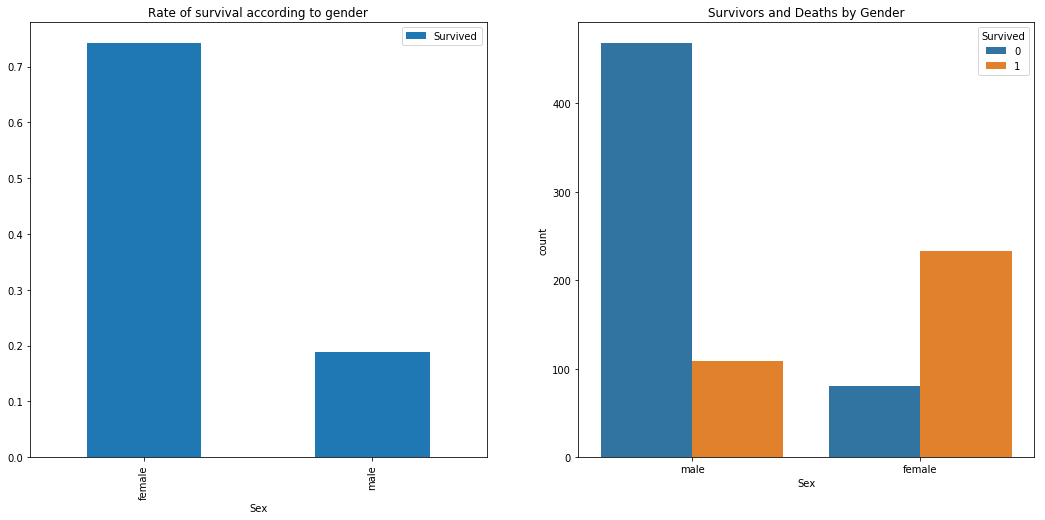

In [32]:
f, ax = plt.subplots(1,2, figsize = (18,8))

df_train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Rate of survival according to gender')
sns.countplot('Sex', hue='Survived', data = df_train, ax=ax[1])
ax[1].set_title('Survivors and Deaths by Gender')

plt.show()